In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
print(data.head())
print(f"\nTotal transactions: {len(data)}")

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [14]:
transactions = []
for i in range(0, len(data)):
    transaction = [str(data.values[i, j]) for j in range(0, 20) if str(data.values[i, j]) != 'nan']
    transactions.append(transaction)
print(f"Total transactions prepared: {len(transactions)}")
print("Sample transaction:", transactions[0])

Total transactions prepared: 7501
Sample transaction: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [15]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("Encoded dataset shape:", df.shape)
df.head()

Encoded dataset shape: (7501, 120)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
frequent_items = apriori(df, min_support=0.005, use_colnames=True)
print(frequent_items.sort_values(by='support', ascending=False).head(10))

     support             itemsets
60  0.238368      (mineral water)
27  0.179709               (eggs)
83  0.174110          (spaghetti)
33  0.170911       (french fries)
20  0.163845          (chocolate)
44  0.132116          (green tea)
59  0.129583               (milk)
45  0.098254        (ground beef)
39  0.095321  (frozen vegetables)
68  0.095054           (pancakes)


In [17]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)
print(rules.head(10))

                           antecedents      consequents  antecedent support  \
1530         (soup, frozen vegetables)  (mineral water)            0.007999   
1772                 (olive oil, soup)  (mineral water)            0.008932   
1512    (olive oil, frozen vegetables)  (mineral water)            0.011332   
1730                      (soup, milk)  (mineral water)            0.015198   
1200                 (soup, chocolate)  (mineral water)            0.010132   
1236               (eggs, cooking oil)  (mineral water)            0.011732   
1488  (frozen vegetables, ground beef)  (mineral water)            0.016931   
1748                    (turkey, milk)  (mineral water)            0.011332   
1802                 (spaghetti, soup)  (mineral water)            0.014265   
1690             (shrimp, ground beef)      (spaghetti)            0.011465   

      consequent support   support  confidence      lift  representativity  \
1530            0.238368  0.005066    0.633333  2.65

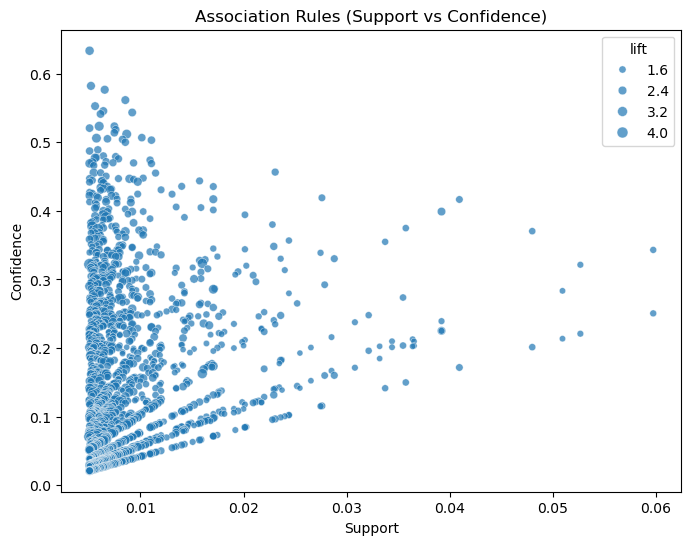

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, alpha=0.7)
plt.title("Association Rules (Support vs Confidence)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [19]:
rules_high_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
print(f"Number of rules with confidence ≥ 0.5: {len(rules_high_conf)}")
print(rules_high_conf.head(10))

Number of rules with confidence ≥ 0.5: 20
                        antecedents      consequents  antecedent support  \
0              (chocolate, chicken)  (mineral water)            0.014665   
1            (olive oil, chocolate)  (mineral water)            0.016398   
2                 (soup, chocolate)  (mineral water)            0.010132   
3               (eggs, cooking oil)  (mineral water)            0.011732   
4               (eggs, ground beef)  (mineral water)            0.019997   
5  (frozen vegetables, ground beef)  (mineral water)            0.016931   
6  (frozen vegetables, ground beef)      (spaghetti)            0.016931   
7    (olive oil, frozen vegetables)  (mineral water)            0.011332   
8         (soup, frozen vegetables)  (mineral water)            0.007999   
9    (olive oil, frozen vegetables)      (spaghetti)            0.011332   

   consequent support   support  confidence      lift  representativity  \
0            0.238368  0.007599    0.518182  2